In [1]:
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
image_size = X_train.shape[1]
X_train = np.reshape(X_train, [-1,image_size,image_size, 1])
X_test = np.reshape(X_test , [-1,image_size, image_size, 1])
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
X_train.shape

(60000, 28, 28, 1)

In [25]:
input_sjape = (image_size, image_size, 1)
batch_size = 32
kernal_size = 3
latent_dim = 10
layer_filters = [32, 64]

In [26]:
inputs = Input(shape=input_sjape, name='encoder_input')
x= inputs
for filters in layer_filters:
    x = Conv2D(filters=filters, kernel_size=kernal_size, activation='relu', strides=2, padding='same')(x)
    

In [27]:
shape = K.int_shape(x)
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)
encoder = Model(inputs, latent, name='encoder')

In [28]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 10)                31370     
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
_________________________________________________________________


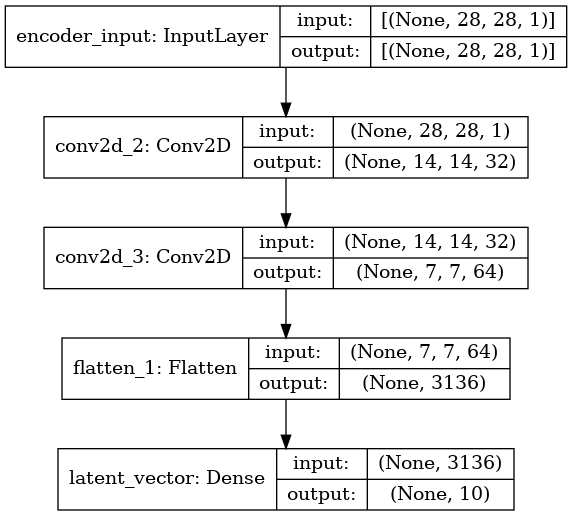

In [29]:
plot_model(encoder, to_file='autonen_mnist.png', show_shapes=True)

In [30]:
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')

In [31]:
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)

In [32]:
x = Reshape((shape[1], shape[2], shape[3]))(x)

In [33]:
for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters, kernel_size=kernal_size, activation='relu', strides=2, padding='same')(x)
    

In [34]:
outputs = Conv2DTranspose(filters=1,kernel_size=kernal_size,activation='sigmoid',padding='same',name='decoder_output')(x)

In [35]:
decoder = Model(latent_inputs, outputs, name='decoder')

In [36]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 10)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              34496     
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
decoder_output (Conv2DTransp (None, 28, 28, 1)         289       
Total params: 90,177
Trainable params: 90,177
Non-trainable params: 0
_______________________________________________________

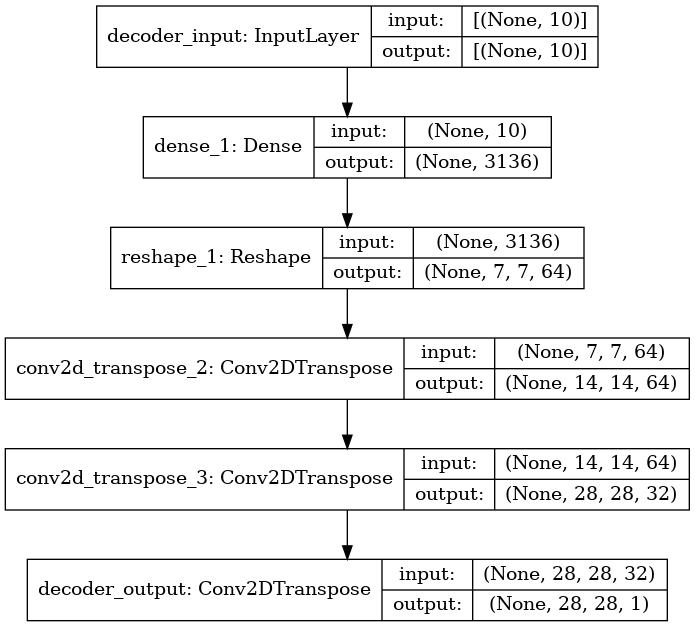

In [37]:
plot_model(decoder, to_file='decoder.png', show_shapes=True)

In [38]:
autoencoder = Model(inputs,decoder(encoder(inputs)),name='autoencoder')

In [39]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 10)                50186     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         90177     
Total params: 140,363
Trainable params: 140,363
Non-trainable params: 0
_________________________________________________________________


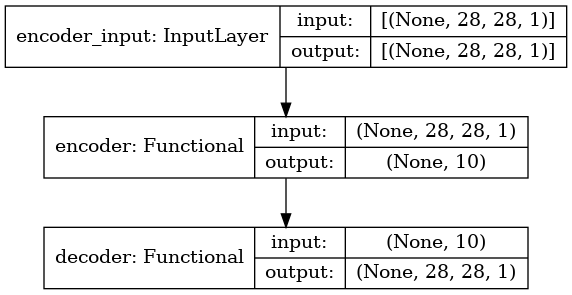

In [40]:
plot_model(autoencoder,to_file='autoencoder.png',show_shapes=True)

In [41]:
autoencoder.compile(loss='mse', optimizer='adam')

In [42]:
autoencoder.fit(X_train,X_train,validation_data=(X_test, X_test),epochs=3,batch_size=batch_size)

Epoch 1/3
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0455 - val_loss: 0.0168
Epoch 2/3
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0165 - val_loss: 0.0149
Epoch 3/3
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0149 - val_loss: 0.0141


In [43]:
autoencoder.save('cool')

INFO:tensorflow:Assets written to: cool/assets


In [45]:
x_decoded = autoencoder.predict(x=X_test)

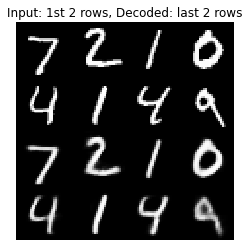

In [49]:
imgs = np.concatenate([X_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig('input_and_decoded.png')
plt.show()

In [50]:
idx = []
import random
for i in range(25):
    idx.append(random.randint(1,10000))

predicted


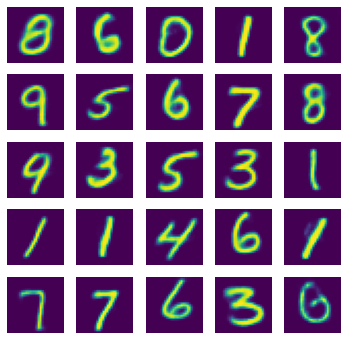

In [55]:
plt.figure(figsize=(6,6))
j=0
print('predicted')
for i in idx:
    plt.subplot(5,5,j+1)
    plt.imshow(x_decoded[i])
    plt.axis('off')
    j+=1

original


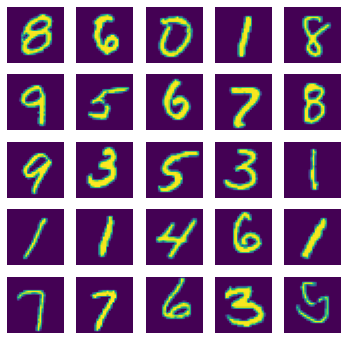

In [56]:
plt.figure(figsize=(6,6))
j=0
print('original')
for i in idx:
    plt.subplot(5,5,j+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    j+=1

In [ ]:
di